In [7]:
# !pip install pyzorder
# !which python

In [23]:
from pyzorder import ZOrderIndexer
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from pyzorder import ZOrderIndexer

zi = ZOrderIndexer((0, 60), (0, 60))

z_2_2 = zi.zindex(2, 2)
# z_2_2 = 12

zi.next_zorder_index(z_2_2)
# return 13

zi.next_zorder_index(15)
# return 36

16

In [45]:
order = []
order_2d = []
order_dih = []

for i in range(60):
    for j in range(60):
        print(i, j, ":", zi.zindex(i,j)) #, "--" , zi.next_zorder_index(i), zi.next_zorder_index(j))
        order_dih.append([dih1[i], dih2[j]])
        order_2d.append([i,j])
        order.append(zi.zindex(i,j))

0 0 : 0
0 1 : 2
0 2 : 8
0 3 : 10
0 4 : 32
0 5 : 34
0 6 : 40
0 7 : 42
0 8 : 128
0 9 : 130
0 10 : 136
0 11 : 138
0 12 : 160
0 13 : 162
0 14 : 168
0 15 : 170
0 16 : 512
0 17 : 514
0 18 : 520
0 19 : 522
0 20 : 544
0 21 : 546
0 22 : 552
0 23 : 554
0 24 : 640
0 25 : 642
0 26 : 648
0 27 : 650
0 28 : 672
0 29 : 674
0 30 : 680
0 31 : 682
0 32 : 2048
0 33 : 2050
0 34 : 2056
0 35 : 2058
0 36 : 2080
0 37 : 2082
0 38 : 2088
0 39 : 2090
0 40 : 2176
0 41 : 2178
0 42 : 2184
0 43 : 2186
0 44 : 2208
0 45 : 2210
0 46 : 2216
0 47 : 2218
0 48 : 2560
0 49 : 2562
0 50 : 2568
0 51 : 2570
0 52 : 2592
0 53 : 2594
0 54 : 2600
0 55 : 2602
0 56 : 2688
0 57 : 2690
0 58 : 2696
0 59 : 2698
1 0 : 1
1 1 : 3
1 2 : 9
1 3 : 11
1 4 : 33
1 5 : 35
1 6 : 41
1 7 : 43
1 8 : 129
1 9 : 131
1 10 : 137
1 11 : 139
1 12 : 161
1 13 : 163
1 14 : 169
1 15 : 171
1 16 : 513
1 17 : 515
1 18 : 521
1 19 : 523
1 20 : 545
1 21 : 547
1 22 : 553
1 23 : 555
1 24 : 641
1 25 : 643
1 26 : 649
1 27 : 651
1 28 : 673
1 29 : 675
1 30 : 681
1 31 : 683
1 

In [52]:
ordered_order_dih = [_[0] for _ in sorted(zip(order_dih, order), key=lambda x: x[1])]
ordered_order_dih = np.array(ordered_order_dih)

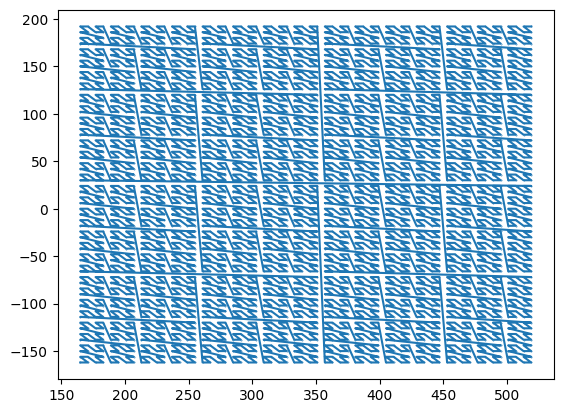

In [53]:
order_dih = np.array(order_dih)

plt.scatter(*order_dih.T, s=0.1)
plt.plot(*ordered_order_dih.T)

In [54]:
ordered_order_dih

array([[ 165., -162.],
       [ 171., -162.],
       [ 165., -156.],
       ...,
       [ 519.,  186.],
       [ 513.,  192.],
       [ 519.,  192.]], shape=(3600, 2))

In [77]:
header = """$constrain
 force constant=0.1
 dihedral: 32,18,15,13, auto
 dihedral: 18,15,13,8, auto
$scan
 mode=sequential
"""
dih1_cmd = " 1:  {start}, {stop}, 2\n"
dih2_cmd = " 2: {start}, {stop}, 2\n"
footer = "$end"

for i, _ in enumerate(ordered_order_dih):
    with open(f"/cluster/home/schmidtn/master/wahlprak/xtb-confs/confs/ALA_neutral_singlet.xyz/dih2dscan-{i}.inp", "w") as f:

        f.write(header)
    

        if i < len(ordered_order_dih) - 1:
            f.write(dih1_cmd.format(start=ordered_order_dih[i][0], 
                                  stop=ordered_order_dih[i+1][0]))
            f.write(dih2_cmd.format(start=ordered_order_dih[i][1], 
                                  stop=ordered_order_dih[i+1][1]))
        f.write(footer)

In [26]:
#  dihedral: 32,18,15,13, 165.0; 165.0, 524.0, 60 
#  dihedral: 18,15,13,8, -162.0; -162.0, 384.0, 60

dih1, dih2 = (np.arange(0, 355.0, 6) + 165), (np.arange(0, 355.0, 6) - 162)

In [27]:
import itertools
from itertools import product as cartesian_product

phi_psi_array = np.array(list(cartesian_product(dih1, dih2)))

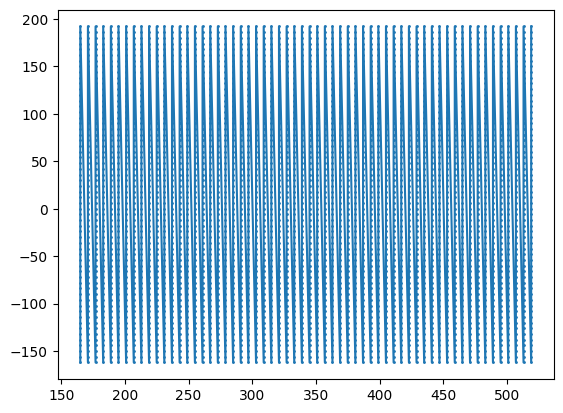

In [28]:
plt.scatter(*phi_psi_array.T, s=1)
plt.plot(*phi_psi_array.T)